In [18]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dat=io.loadmat('/home/maria/Documents/NeuralDataAnalysis/MITCompNeuroCourse/fish.mat')
print(dat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue Feb  6 23:17:54 2001', '__version__': '1.0', '__globals__': [], 'rho': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8), 'stim': array([[ 238.0371],
       [ 236.8164],
       [ 231.9336],
       ...,
       [-283.2031],
       [-284.4238],
       [-284.4238]]), 'time': array([[0.000000e+00],
       [5.000000e-01],
       [1.000000e+00],
       ...,
       [1.382385e+05],
       [1.382390e+05],
       [1.382395e+05]])}


In [4]:
#1.
#a. How many spikes are in the whole experiment?
print(np.sum(dat['rho']))

43408


In [6]:
#b. how long is the whole experiment in seconds?
print(dat['time'].flatten()[-1]/1000)

138.2395


In [7]:
#c. What is the firing rate in Hz averaged over the whole experiment?
print(np.sum(dat['rho'])/(dat['time'].flatten()[-1]/1000))

314.0057653565009


In [15]:
#d. How many spikes are in the first half of the experiment? 
print(dat['time'].shape)
times=int(dat['time'].shape[0]/2)
print(times)
np.sum(dat['rho'][:int(times)])

(276480, 1)
138240


21839

In [16]:
#e.What is the firing rate in Hz, averaged over the first half of the experiment?
print(np.sum(dat['rho'][:times])/(dat['time'][:times].flatten()[-1]/1000))

315.9600402201983


1027.832
-677.4902


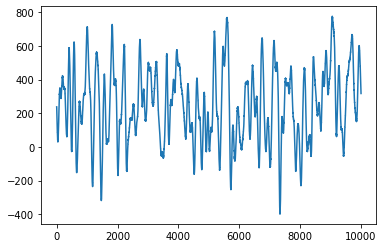

In [21]:
#f.What is the maximum value of the stimulus? 
print(np.max(dat['stim']))
#g. What is the minimum value of the stimulus?
print(np.min(dat['stim']))
plt.plot(dat['stim'][:10000])

In [26]:
#(h) At what time (in milliseconds) did the hundredth spike occur?
cntr=0
j=0
while cntr<100:
    if dat['rho'][j]:
        cntr+=1
    j+=1
print(cntr)
print(j)
print(np.sum(dat['rho'][:j]))
print('Answer:',dat['time'][j])

100
621
100
Answer: [310.5]


In [27]:
#(i) What is the mean of the spike train?
print(np.mean(dat['rho']))

0.1570023148148148


In [28]:
#(j) What is the variance of the spike train? 
print(np.var(dat['rho']))

0.13235258795760457


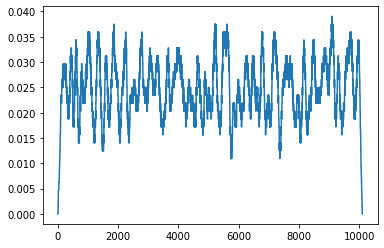

In [74]:
#2.Firing rates
filtr=np.ones(101)/101
rho=dat['rho'][:10000].flatten()
prob=*np.convolve(filtr,rho)
plt.plot(prob)

(10100,)
(10000, 2)
(2, 1)
[[244.7171954 ]
 [244.7171954 ]
 [244.7171954 ]
 ...
 [245.20388373]
 [245.20388373]
 [245.20388373]]


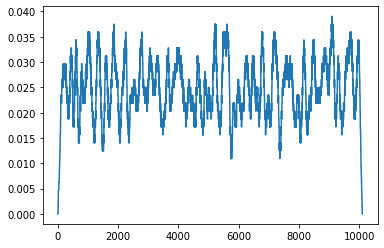

(10000,)
(10000, 1)
[[1. 1.]
 [1. 1.]]


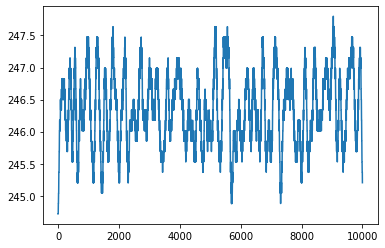

In [83]:
#3.Linear regression
print(prob.shape)
X=np.vstack((np.ones(10100),prob)).T[50:10050]
print(X.shape)
stim=dat['stim'][:10000]
lam=100
theta=np.linalg.solve((X.T @ X+ lam * np.eye(2)),  (X.T@stim))
print(lin_regr.shape)
prediction=X@theta
print(prediction)
plt.plot(prob)
plt.show()
plt.plot(prediction)
print(prob[50:10050].shape)
print(prediction.shape)
print(np.corrcoef(prob[50:10050],prediction.flatten()))